In [1]:
setwd("/projects/PPC/analysis/ppc_eqtls")

source("scripts/packages.R"  )
source("scripts/functions.R" )
source("scripts/input_data.R")
source("scripts/general_plotting_functions.R")

library(png)
library(grid)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


# ADSL

In [35]:
load("reviews/figures/gwas.adsl.robj", verbose = T)
toplot2 = datalist$toplot
table(toplot2$gene_name, toplot2$tissue)

Loading objects:
  datalist


      
       Cholesterol Endocrine Exocrine finemap iPSC-PPC LDL direct
  ADSL        7067      1400     1959    1912     1136       7067
  ST13        7067      1399     1957    1913     1866       7067

Loading objects:
  datalist
[1] 41049522
[1] 41449522


Warning message:
“Removed 624 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 624 rows containing missing values (`geom_point()`).”


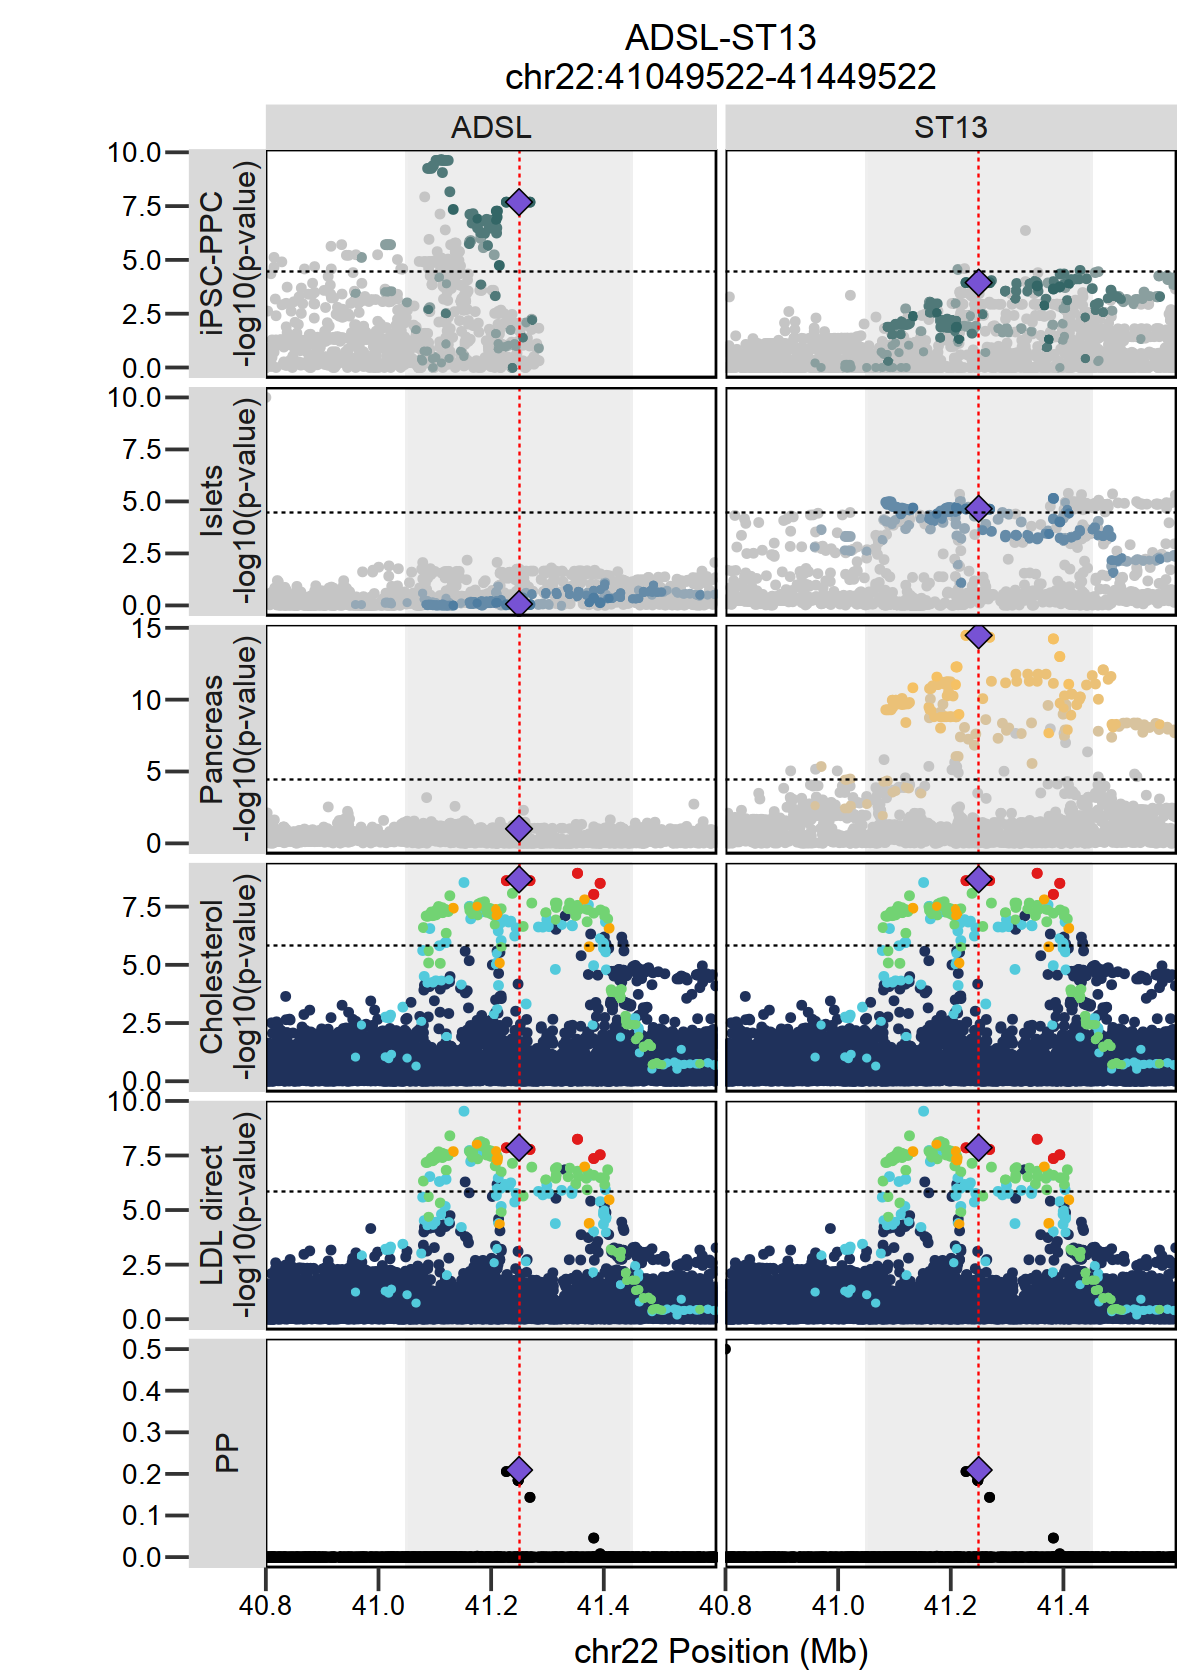

In [10]:
adsl = function()
{
    load("reviews/figures/gwas.adsl.robj", verbose = T)
    toplot2 = datalist$toplot
    highlight = datalist$highlight
    sigline = datalist$sigline
    
    chr = 22
    
    print((highlight$pos/1e+06 - 0.2) * 1e6)
    print((highlight$pos/1e+06 + 0.2) * 1e6)
    
    sigline[sigline$strip %in% sigline$strip[which(sigline$strip %like% "Islets" | sigline$strip %like% "PPC" | 
                                                   sigline$strip %like% "Pancreas")],]$yintercept = 3.47705146036161e-05
    
    
    ggplot(toplot2, aes(x = pos/1e6, y = -log10(pval), color = color_id2, label = gene_name)) +
        facet_grid(strip~gene_name, scales = "free_y", switch = "y") + jn_theme +
        geom_rect(xmin = highlight$pos/1e+06 - 0.2, xmax = highlight$pos/1e+06 + 0.2, ymin = -Inf, ymax = Inf, fill = "#efefef", color = "#efefef", alpha = 0.2) + 
        geom_point(size = 2) + 
        scale_color_identity() +
        geom_point(data = toplot2 %>% filter(color_id2 != "#e5e5e5")) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.2)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.4)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.6)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.8), size = 2) + 
        geom_vline(xintercept = highlight$pos/1e6, color = "red", linetype = "dashed") +
        geom_point(data = toplot2 %>% filter(id == highlight$id), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(id == highlight$id), color = "black",  size = 5, shape = 5) +
        geom_point(data = toplot2 %>% filter(strip %like% "Exo" & id == highlight$id) %>% filter(id == highlight$id), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(strip %like% "Exo" & id == highlight$id) %>% filter(id == highlight$id), color = "black",  size = 5, shape = 5) +
        geom_point(data = toplot2 %>% filter(strip %like% "PPA") %>% filter(id == highlight$id), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(strip %like% "PPA") %>% filter(id == highlight$id), color = "black",  size = 5, shape = 5) +
        theme(panel.border = element_rect(size = 0.8), 
                  axis.ticks = element_line(size = 0.8),
                  plot.title = element_text(hjust = 0.5, size = 21.5),
                  strip.text = element_text(size = 18), 
                  axis.text.y = element_text(size = 16.5),
                  axis.text = element_text(size = 16),
                  axis.title = element_text(size = 20)
             ) + 
        ggtitle(paste0("ADSL-ST13\n", paste0("chr", chr, ":", highlight$pos - 0.2e6, "-", highlight$pos + 0.2e6)))   +
        xlab(paste0("chr", chr, " Position (Mb)")) + ylab("")  +
        guides(color = guide_legend(override.aes = list(size = 3))) +
        scale_x_continuous(expand = c(0, 0)) +
        geom_hline(data = sigline, aes(yintercept = -log10(yintercept)), linetype = "dashed") 
}

psize(w = 10, h = 14)
adsl()

# CDC37L1-DT

Next, we plot eQTL and GWAS signals around the CDC37L1-DT locus. To make this figure, we also plot the p-values for eQTL association with other eGenes in the vicinity to show that the iPSC-PPC CDC37L1-DT eQTL is indeed unique to iPSC-PPC

In [32]:
a = eqtl %>% filter(gene_name %like% "CDC37L1-DT" & type == 0)
a
0.05 / a$tests

transcript_id,gene_id,gene_name,gene_type,start,end,strand,chrom,pos,ref,⋯,beta,se,pval,bonferroni,fdr,tests,type,qval,egene,distance
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<int>
ENSG00000273061.1_7,ENSG00000273061.1_7,CDC37L1-DT,lncRNA,4676600,4679502,-,9,4292083,G,⋯,1.460003,0.293134,9.560143e-08,0.0003460772,0.0002548734,2666,0,0.001517626,TRUE,387419


[1] 1.875469e-05

In [36]:
load("reviews/figures/gwas.cdc37.robj", verbose = T)

toplot2 = datalist$toplot

table(toplot2$gene_name, toplot2$tissue)
datalist$highlight

Loading objects:
  datalist


            
             Endocrine Exocrine Fasting Glucose finemap iPSC-PPC
  AK3             1380     1715            5612       0        0
  AL136980.1         0        0            5612       0        0
  AL162253.2         0        0            5612       0        0
  AL162419.1      1380        0            5612       0        0
  CD274              0        0            5612       0        0
  CDC37L1         1380        0            5612       0        0
  CDC37L1-DT      1380     1716            5612       0     1225
  ERMP1              0        0            5612       0        0
  GLIS3           1381        0            5612       0        0
  GLIS3-AS1       1380        0            5612       0        0
  JAK2            1380     1715            5612       0        0
  KIAA2026           0        0            5612       0        0
  MLANA              0        0            5612       0        0
  PDCD1LG2           0        0            5612       0        0
  PLGRKT    

,id,qtl_id,chr,pos,pval,tissue,transcript_id,beta,gene_id,type,lead,gene_name,dataid,label,LD,LD_class,color_id,strip,color_cat,color_id2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>
1,9_4292083_G_A,type1_diabetes,9,4292083,1.33e-18,Type 1 Diabetes,type1_diabetes,0.124426,type1_diabetes,0,NA,GLIS3-AS1,NA,rs10758593,1,Lead,#7752d4,Type 1 Diabetes -log10(p-value),GWAS,#7752d4


Loading objects:
  datalist


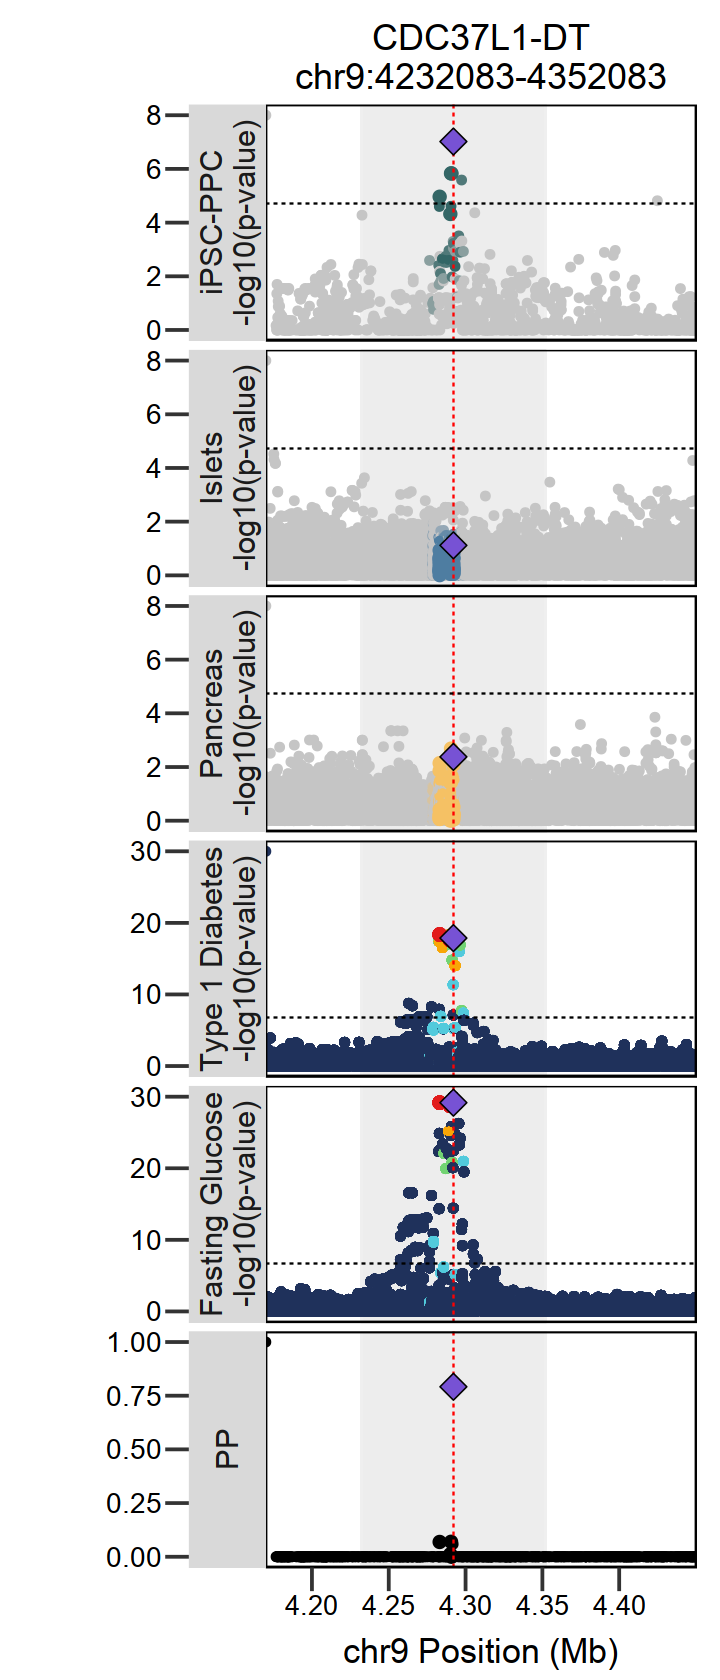

In [33]:
cdc37 = function()
{
    load("reviews/figures/gwas.cdc37.robj", verbose = T)
    toplot2 = datalist$toplot 
    sigline = datalist$sigline
    highlight = datalist$highlight
    a = datalist$a
    
    chr = 9
    
    sigline[sigline$strip %in% sigline$strip[which(sigline$strip %like% "Islets" | sigline$strip %like% "PPC" | 
                                                   sigline$strip %like% "Pancreas")],]$yintercept = 1.8754688672168e-05
    
    
    ggplot(toplot2, aes(x = pos/1e6, y = -log10(pval), color = color_id2, label = gene_name)) +
        facet_wrap(~strip, scales = "free_y", ncol = 1, strip.position = "left") + jn_theme +
        
        geom_rect(xmin = highlight$pos/1e+06 - 0.06, xmax = highlight$pos/1e+06 + 0.06, ymin = -Inf, ymax = Inf, fill = "#efefef", color = "#efefef", alpha = 0.2) + 
        geom_point(size = 2) + 
        scale_color_identity() +
        geom_point(data = toplot2 %>% filter(LD >= 0.6)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.8), size = 3) + 
#         geom_point(data = toplot2 %>% filter(LD >= 0.8), color = "black", shape = 1, size = 3) + 
        geom_point(data = toplot2 %>% filter(strip == "PP" & LD >= 0.6)) + 
        geom_point(data = toplot2 %>% filter(lead == T), color = "red", size = 4) + 
        geom_vline(xintercept = highlight$pos/1e6, color = "red", linetype = "dashed") +
        geom_point(data = a, color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = a, color = "black",  size = 5, shape = 5) +
        theme(panel.border = element_rect(size = 0.8), 
                  axis.ticks = element_line(size = 0.8),
                  plot.title = element_text(hjust = 0.5, size = 21.5),
                  strip.text = element_text(size = 18), 
                  axis.text.y = element_text(size = 16.5),
                  axis.text = element_text(size = 16),
                  axis.title = element_text(size = 20)
             ) +  
        ggtitle(paste0("CDC37L1-DT\n", paste0("chr", chr, ":", highlight$pos - 0.06e6, "-", highlight$pos + 0.06e6)))   +
        xlab(paste0("chr", chr, " Position (Mb)")) + ylab("")  +
        guides(color = guide_legend(override.aes = list(size = 3))) +
        scale_x_continuous(expand = c(0, 0)) +
        geom_hline(data = sigline, aes(yintercept = -log10(yintercept)), linetype = "dashed")

}

psize(w = 6, h = 14)
cdc37()

# TPD52

To plot this locus, we also included eQTL associations for other eGenes in the vicinity in the adult tissues to show that the TPD52 eQTL in iPSC-PPC is indeed unique to iPSC-PPC. For plotting purpose, for each variant, we plot the eQTL 

In [35]:
a = eqtl %>% filter(gene_name == "TPD52" & type == 0)
a
0.05 / a$tests

transcript_id,gene_id,gene_name,gene_type,start,end,strand,chrom,pos,ref,⋯,beta,se,pval,bonferroni,fdr,tests,type,qval,egene,distance
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<int>
ENSG00000076554.15_7,ENSG00000076554.15_7,TPD52,protein_coding,80946980,81143467,-,8,81077991,G,⋯,-0.9857683,0.1824062,1.105992e-09,3.241663e-06,2.157791e-06,1951,0,2.136252e-05,TRUE,65476


[1] 2.562788e-05

In [37]:
load("reviews/figures/gwas.tpd52.robj", verbose = T)

toplot2 = datalist$toplot 
datalist$highlight

table(toplot2$gene_name, toplot2$tissue)

Loading objects:
  datalist


id,qtl_id,chr,pos,pval,beta,tissue,transcript_id,gene_id,type,lead,gene_name,dataid,label,LD,LD_class
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<chr>
8_81078464_C_T,0 ENSG00000076554,8,81078464,1.272175e-08,-0.9119044,iPSC-PPC,0 ENSG00000076554,ENSG00000076554,0,NA,TPD52,1592,NA,0.6845,"[0.6, 0.8)"


            
             Endocrine Exocrine Fasting Glucose finemap iPSC-PPC
  AC009686.2        34        0            2258       0        0
  AC009812.1         0        0            2258       0        0
  AC009812.3        25        0            2258       0        0
  AC009812.4        36        0            2258       0        0
  AC036214.2        48        0            2258       0        0
  AC068700.1         0        0            2258       0        0
  AC100854.1         0        0            2258       0        0
  FABP4              0        0            2258       0        0
  FABP5              0        0            2258       0        0
  FTH1P11            0        0            2258       0        0
  HEY1               1      211            2258       0        0
  IL7                0        0            2258       0        0
  LINC01607        106       73            2258       0        0
  LINC02605          0        0            2258       0        0
  MRPS28    

Loading objects:
  datalist


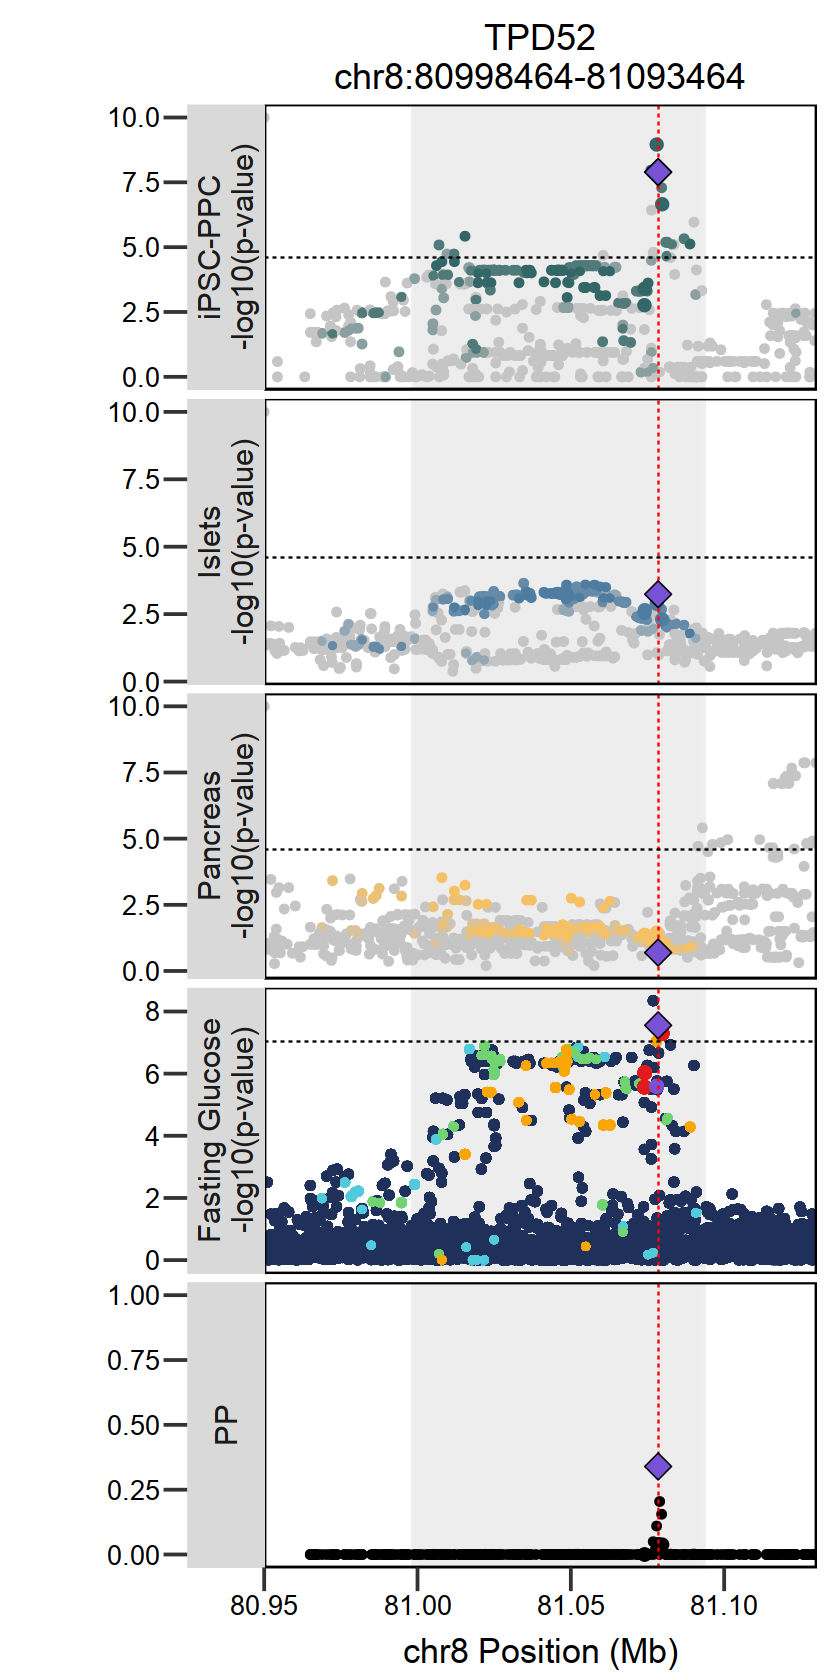

In [24]:
tpd52 = function()
{
    chr = 8
    load("reviews/figures/gwas.tpd52.robj", verbose = T)
    
    toplot2 = datalist$toplot 
    highlight = datalist$highlight
    sigline = datalist$sigline
    
    sigline[sigline$strip %in% sigline$strip[which(sigline$strip %like% "Islets" | sigline$strip %like% "PPC" | 
                                                   sigline$strip %like% "Pancreas")],]$yintercept = 2.56278831368529e-05
    
    p = ggplot(toplot2, aes(x = pos/1e6, y = -log10(pval), color = color_id2, label = gene_name)) +
        facet_wrap(~strip, ncol = 1, strip.position = "left", scales = "free_y") + jn_theme +
        geom_vline(xintercept = highlight$pos/1e6, color = "red", linetype = "dashed") +
        geom_rect(xmin = highlight$pos/1e+06 - 0.08, xmax = highlight$pos/1e+06 + 0.015, ymin = -Inf, ymax = Inf, fill = "#efefef", color = "#efefef", alpha = 0.2) + 
        geom_point(size = 2) + 
        scale_color_identity() +
        geom_point(data = toplot2 %>% filter(color_id2 != "#e5e5e5")) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.2)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.4)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.6)) + 
        geom_point(data = toplot2 %>% filter(LD >= 0.8), size = 3) + 
        geom_vline(xintercept = highlight$pos/1e6, color = "red", linetype = "dashed") +
        geom_point(data = toplot2 %>% filter(id == highlight$id & gene_name == "TPD52"), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(id == highlight$id & gene_name == "TPD52"), color = "black",  size = 5, shape = 5) +
        geom_point(data = toplot2 %>% filter(id == highlight$id & strip %like% "Islet"), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(id == highlight$id & strip %like% "Panc"), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(id == highlight$id & strip %like% "Islet"), color = "black",  size = 5, shape = 5) +
        geom_point(data = toplot2 %>% filter(id == highlight$id & strip %like% "Panc"), color = "black",  size = 5, shape = 5) +
        geom_point(data = toplot2 %>% filter(strip %like% "PP") %>% filter(id == highlight$id), color = "#7752d4", size = 7, shape = 18) + 
        geom_point(data = toplot2 %>% filter(strip %like% "PP") %>% filter(id == highlight$id), color = "black",  size = 5, shape = 5) +
        theme(panel.border = element_rect(size = 0.8), 
                  axis.ticks = element_line(size = 0.8),
                  plot.title = element_text(hjust = 0.5, size = 21.5),
                  strip.text = element_text(size = 18), 
                  axis.text = element_text(size = 16)
             ) + 
        ggtitle(paste0("TPD52\n", paste0("chr", chr, ":", highlight$pos - 0.08e6, "-", highlight$pos + 0.015e6)))   +
        xlab(paste0("chr", chr, " Position (Mb)")) + ylab("")  +
        guides(color = guide_legend(override.aes = list(size = 3))) +
        scale_x_continuous(expand = c(0, 0)) + 
        geom_hline(data = sigline, aes(yintercept = -log10(yintercept)), linetype = "dashed")
    
    return(p)
}

psize(w = 7, h = 14)
tpd52()


Loading objects:
  datalist
Loading objects:
  datalist
Loading objects:
  datalist
[1] 41049522
[1] 41449522


Warning message:
“Removed 624 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 624 rows containing missing values (`geom_point()`).”


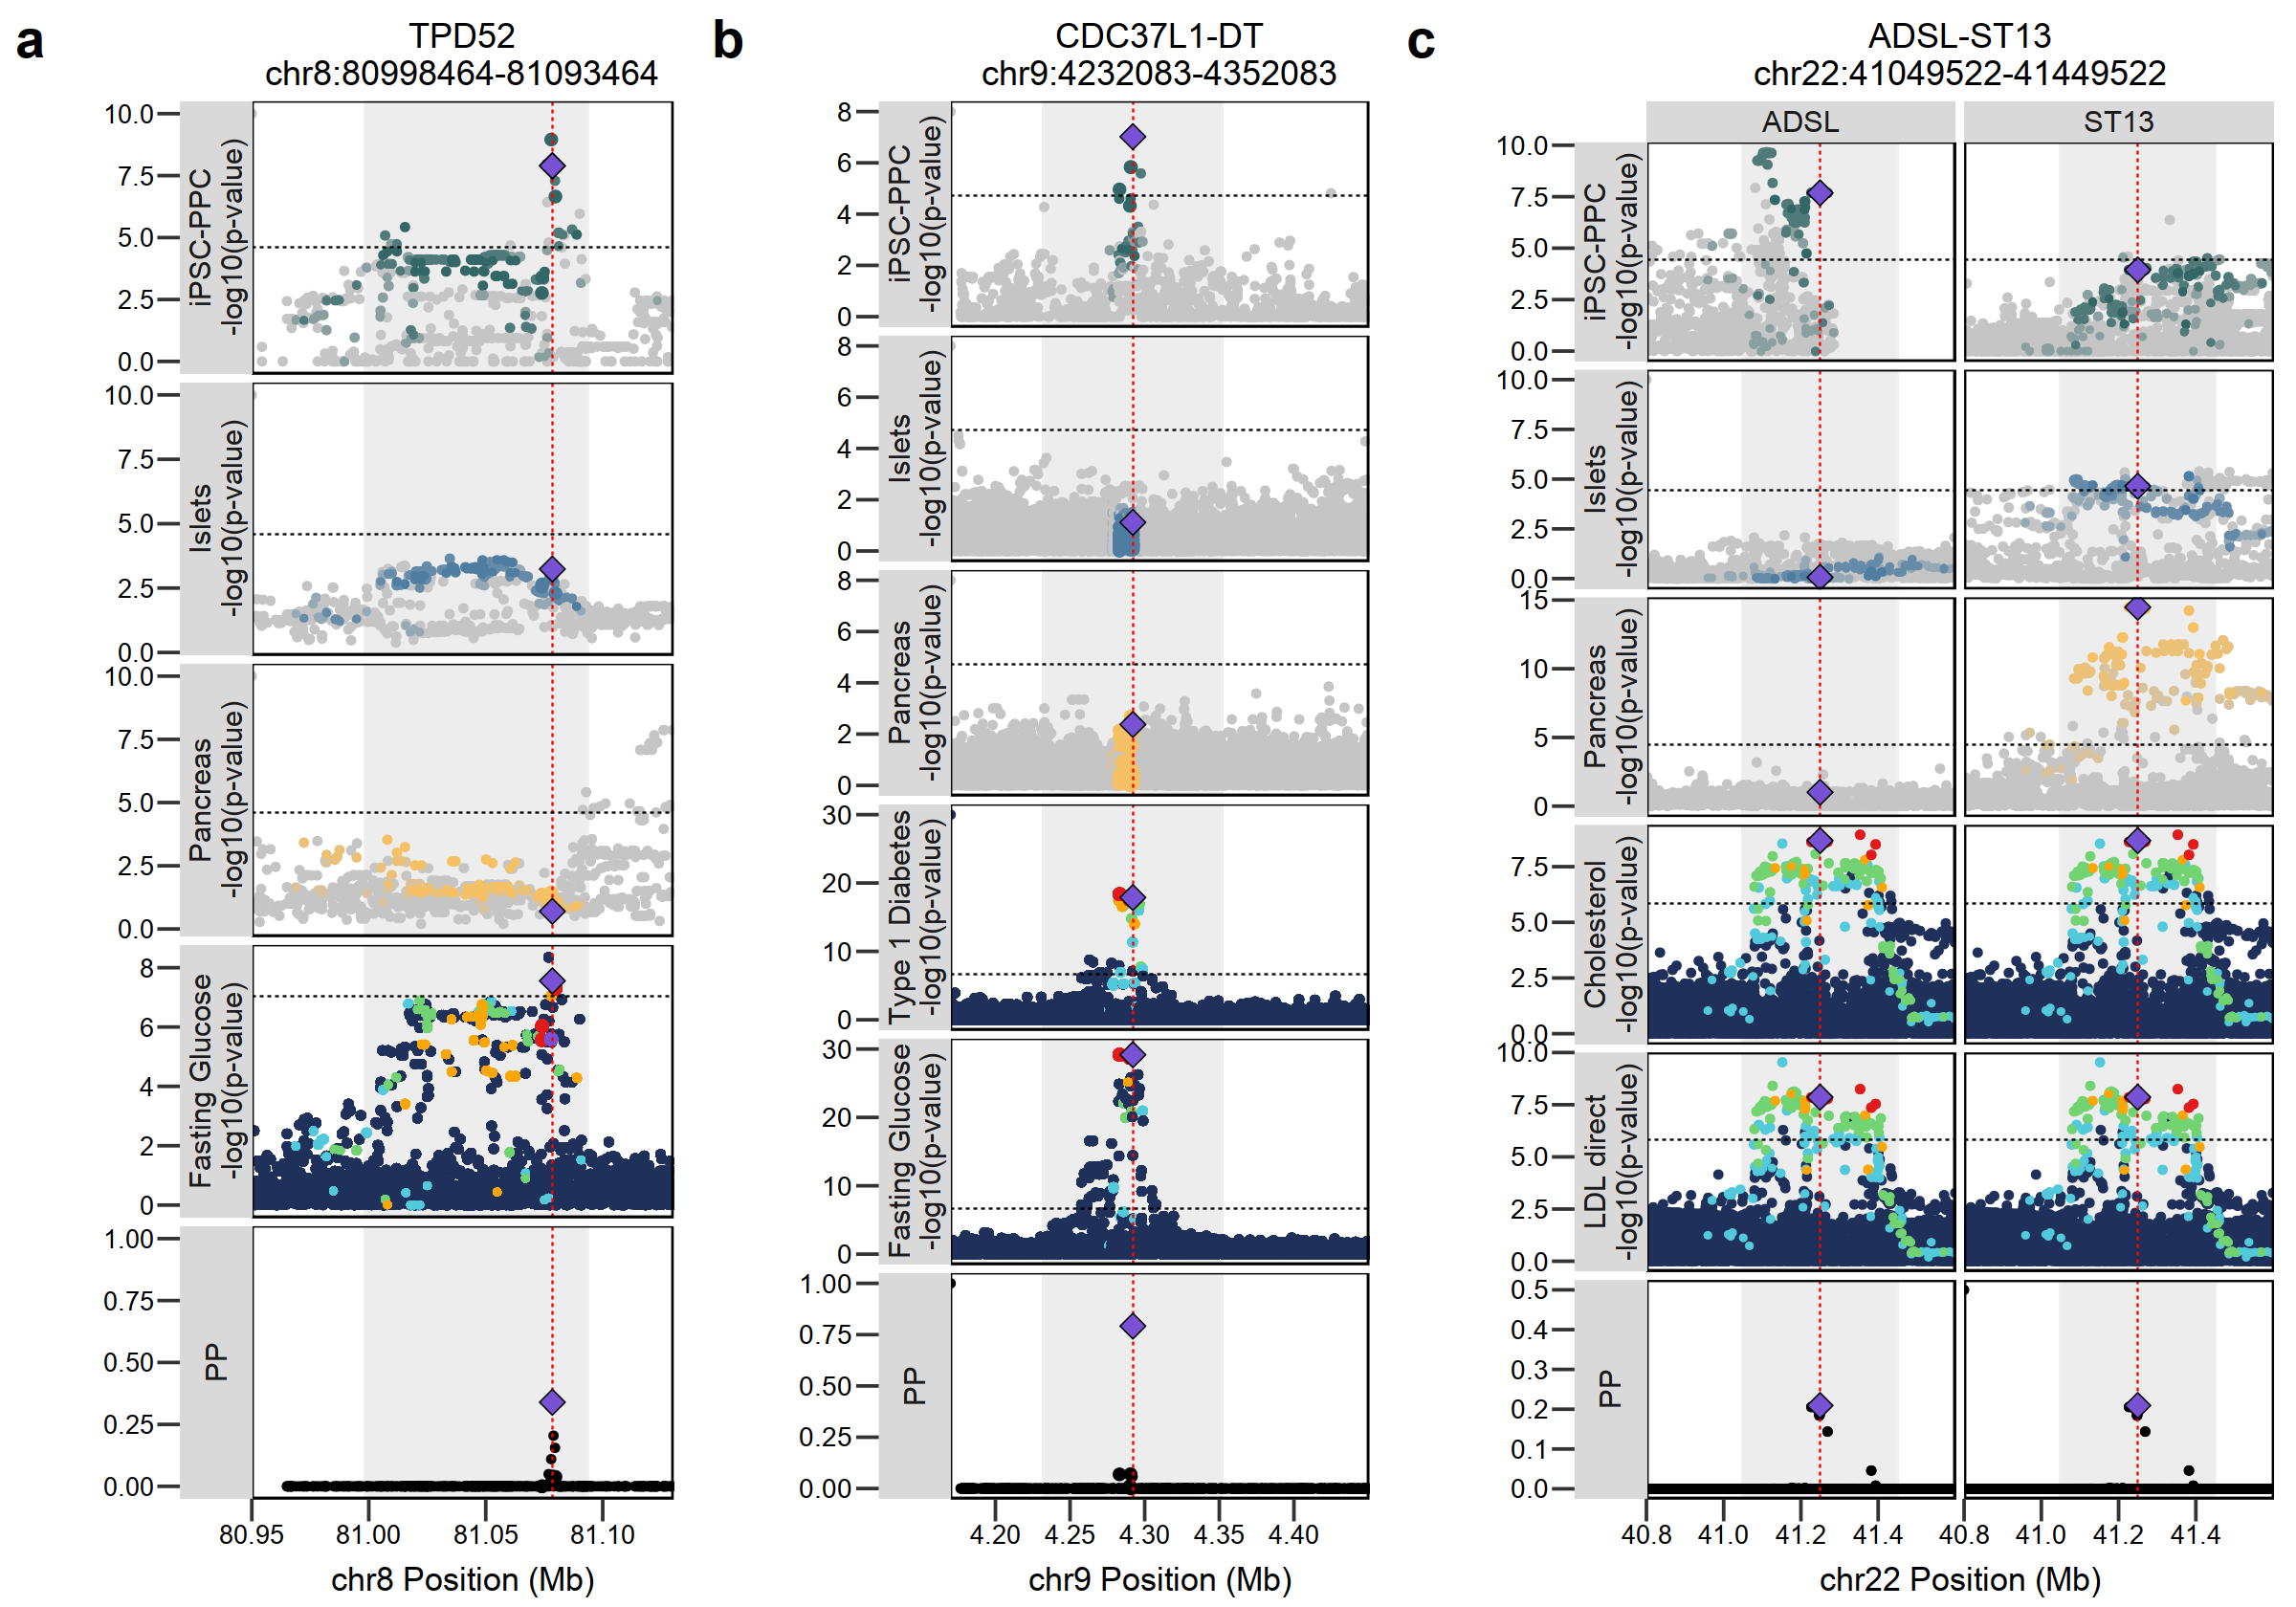

In [34]:
psize(w = 20, h = 14)
plot_grid(tpd52(), cdc37(), adsl(), nrow = 1, rel_widths = c(1, 1, 1.3), labels = c("a", "b", "c"), label_size = 33)